# Test Step Motor

In [ ]:
! sudo apt-get install python3-rpi.gpio
! pip install RPi.GPIO

[sudo] password for jh20akim: 

In [1]:
import RPi.GPIO as GPIO
import threading                                                                
from collections import deque

# for logging
import logging
logging.basicConfig(
    filename="StepMotor28BYJ_Test.log",
    format='%(asctime)s %(levelname)s:%(message)s',
    level=logging.DEBUG,
    datefmt='%m/%d/%Y %I:%M:%S %p',
)
###

class StepMotor28BYJ:
    def __init__(self, aint=3, bint=5, aint2=7, bint2=8):        
        self.aint = aint    
        self.bint = bint    
        self.aint2 = aint2    
        self.bint2 = bint2
        self.sig= deque([1,0,0,0])
        self.lock = threading.RLock()
        logging.debug('constructed')
        
    def init(self):
        logging.debug('init called')
        GPIO.setmode(GPIO.BOARD)
        GPIO.setup(self.aint,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.bint,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.aint2,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.bint2,GPIO.OUT,initial=GPIO.LOW)
        logging.debug('init succeed')
        
    def rotate(self, direction=True):
        logging.debug('rotate called')
        with self.lock:
            sig = self.sig
            GPIO.output(self.aint,sig[0])
            GPIO.output(self.bint,sig[1])
            GPIO.output(self.aint2,sig[2])
            GPIO.output(self.bint2,sig[3])
            sig.rotate(1 if direction else -1)
            logging.debug('rotate succeed')

            
    def deinit(self):
        GPIO.cleanup()
        logging.debug('deInit succeed')
        
   

In [2]:
import time

# Set count as 1000
targetCnt = 1000 

try:
    motor = StepMotor28BYJ()
    motor.init()
        
    for cnt in range(0, targetCnt):
        if cnt % 100 == 0 :
            print ("current cnt: ", cnt)
        motor.rotate(True)
        time.sleep(0.002)
except KeyboardInterrupt:
    pass
finally:
    motor.deinit()

current cnt:  0
current cnt:  100
current cnt:  200
current cnt:  300
current cnt:  400
current cnt:  500
current cnt:  600
current cnt:  700
current cnt:  800
current cnt:  900


# Test Servo Motor

In [3]:
import RPi.GPIO as GPIO
import time

GPIO.setmode(GPIO.BOARD)

# set up GPIO pin for servo control
servo_pin = 12
GPIO.setup(servo_pin, GPIO.OUT)

# set up PWM signal for servo control
pwm = GPIO.PWM(servo_pin, 50)

# set initial position of servo motor
pwm.start(2.5)
# rotate the motor to the 90 degree position
pwm.ChangeDutyCycle(7.5)
time.sleep(1)

# rotate the motor back to the 0 degree position
pwm.ChangeDutyCycle(2.5)
time.sleep(1)

# clean up GPIO pins
pwm.stop()
GPIO.cleanup()

In [4]:
import RPi.GPIO as GPIO
import time

# GPIO Servo모터 제어

servo_pin = 12
GPIO.setmode(GPIO.BOARD)
GPIO.setup(servo_pin, GPIO.OUT)
pwm = GPIO.PWM(servo_pin, 50) # 50Hz( 서보모터 PWM 동작을 위한 주파수 )
pwm.start(3.0) # 서보모터의 0도 위치( 0.6ms ) 이동: 값 3.0은 pwm 주기인 20ms 의 3% 를 의미

for cnt in range(0,3):
    pwm.ChangeDutyCycle(3.0) # 0도
    time.sleep(1.0)
    pwm.ChangeDutyCycle(7.5) # 90도
    time.sleep(1.0)
    pwm.ChangeDutyCycle(12.5) # 180도
    time.sleep(1.0)
pwm.stop()

In [5]:
import RPi.GPIO as GPIO
import threading

class ServoMotorSG90:
    def __init__(self, servo_pin=12):        
        self.servo_pin = servo_pin    
        GPIO.setmode(GPIO.BOARD)
        GPIO.setup(servo_pin, GPIO.OUT)
        self.lock = threading.RLock()
        self.pwm = GPIO.PWM(self.servo_pin, 50) # 50Hz( 서보모터 PWM 동작을 위한 주파수 )
        self.pwm.start(3.0) # 서보모터의 0도 위치( 0.6ms ) 이동: 값 3.0은 pwm 주기인 20ms 의 3% 를 의미
       
        
    def rotate(self, degree):
        with self.lock:
            sig = max(0, min(180, degree))
            duty = ( 12.5 * ( sig / 180 ))
            self.pwm.ChangeDutyCycle (duty) 
            
            
    def deinit(self):
        GPIO.cleanup()
        

In [6]:
import time

servo = ServoMotorSG90()
try:    
    for degree in [0, 90, 120, 180, 120, 90, 0]:
        print ("Rotate now ", degree)
        servo.rotate(degree)        
        time.sleep(1)
except KeyboardInterrupt:
    pass
finally:
    servo.deinit()

Rotate now  0
Rotate now  90
Rotate now  120
Rotate now  180
Rotate now  120
Rotate now  90
Rotate now  0


# Capture Camera image

In [ ]:
! sudo apt install libopencv-dev python3-opencv python3-scipy
# ! pip install opencv-python

In [4]:
import cv2

for index in range(10):
    cap = cv2.VideoCapture(index)
    if cap.read()[0]:
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        print(f"Camera index {index} is available")
        print(f"Frame rate: {fps}")
        print(f"Width: {width}, Height: {height}")
    else:
        print(f"Camera index {index} is not available")
    cap.release()

Camera index 0 is available
Frame rate: 10.0
Width: 1280.0, Height: 720.0
Camera index 1 is not available
Camera index 2 is not available
Camera index 3 is not available
Camera index 4 is not available
Camera index 5 is not available
Camera index 6 is not available
Camera index 7 is not available
Camera index 8 is not available
Camera index 9 is not available


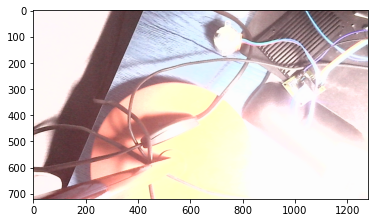

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Open the first webcam device
capture = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not capture.isOpened():
    print("Cannot open camera")
    exit()

# Read a frame from the webcam
ret, frame = capture.read()

# Check if the frame is empty
if not ret:
    print("Failed to read")
    exit()

# Display the frame
# cv2.imshow("Webcam", frame)
plt.imshow(frame)
plt.show()

# Release the webcam and destroy all windows
capture.release()
cv2.destroyAllWindows()

# Test inference

In [7]:

import cv2.dnn
  
model: cv2.dnn.Net = cv2.dnn.readNetFromONNX("/home/pi/Projects/protowork/solution/Control/python/visions/models/best.onnx")


error: OpenCV(4.7.0) /tmp/pip-install-fg18zo6p/opencv-python_b8d9d0c8d0d84264997a294b775c4ab4/opencv/modules/dnn/src/onnx/onnx_importer.cpp:1073: error: (-2:Unspecified error) in function 'handleNode'
> Node [Split@ai.onnx]:(onnx_node!/model.22/Split) parse error: OpenCV(4.7.0) /tmp/pip-install-fg18zo6p/opencv-python_b8d9d0c8d0d84264997a294b775c4ab4/opencv/modules/dnn/src/layers/slice_layer.cpp:274: error: (-215:Assertion failed) splits > 0 && inpShape[axis_rw] % splits == 0 in function 'getMemoryShapes'
> 

In [ ]:
! pip install opencv-python==4.7.0.72

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
